VISIONER

Sandy Tirta Pratama

Sentiment Analyst



In [ ]:
#download dataset Sentimen Analyst
#!wget https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia

In [1]:
#Import library yang dibutuhkan
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle

warnings.filterwarnings("ignore")

In [2]:
#instal library sastrawi
!pip -q install sastrawi

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
#reading the dataset

data= pd.read_excel('dataset_tweet_sentiment_opini_film.xlsx')
data.head(10)

In [ ]:
data = data.rename(columns={'Text Tweet': 'Tweet'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         201 non-null    int64 
 1   Sentiment  201 non-null    object
 2   Tweet      201 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [ ]:
def convert(Sentiment):
  if Sentiment =="negative":
    return 0
  elif Sentiment =="positive":
    return 1

data['Sentiment']= data['Sentiment'].apply(convert)    

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#encoder label in column'sentiment'
Y= data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
data.head(10)

,Id,Sentiment,Tweet
0,1,0,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,0,Film king Arthur ini film paling jelek dari se...
2,3,0,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,0,Ane ga suka fast and furious..menurutku kok je...
4,5,0,"@baekhyun36 kan gua ga tau film nya, lu bilang..."
5,6,0,tolong editingnya yg bagus ya. Saya sering kec...
6,7,0,Kecewa dgn salah satu aktornya yg ternyata pen...
7,8,0,Kecewa parah sama film the guys. Dear @raditya...
8,9,0,Banyak yg kecewa abis nonton film ini :(
9,10,0,#TheMummy 2017 adalah film yang paling memgece...


Text **Preprocessing**

Menggunakan case folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = data['Tweet'].iloc[5]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  tolong editingnya yg bagus ya. Saya sering kecewa dgn film indonesia. Ditunggu filmnya!!
Case folding	:  tolong editingnya yg bagus ya saya sering kecewa dgn film indonesia ditunggu filmnya


In [ ]:
data.head()

,Id,Sentiment,Tweet
0,1,0,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,0,Film king Arthur ini film paling jelek dari se...
2,3,0,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,0,Ane ga suka fast and furious..menurutku kok je...
4,5,0,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


Word Normalization

In [ ]:
# Download corpus kumpulan slangwords
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2023-04-05 01:10:57--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.005s  

2023-04-05 01:10:57 (17.1 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [ ]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

Menggunakan filtering/Stopwords removal

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind[:20]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara']

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = []                    # Tambahkan kata lain dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['Tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  tolong editingnya yg bagus ya. Saya sering kecewa dgn film indonesia. Ditunggu filmnya!!
Case folding		:  tolong editingnya yg bagus ya saya sering kecewa dgn film indonesia ditunggu filmnya
Stopword removal	:  tolong editingnya yg bagus ya kecewa dgn film indonesia ditunggu filmnya


Menggunakan Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['Tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  tolong editingnya yg bagus ya. Saya sering kecewa dgn film indonesia. Ditunggu filmnya!!
Case folding		:  tolong editingnya yg bagus ya saya sering kecewa dgn film indonesia ditunggu filmnya
Stopword removal	:  tolong editingnya yg bagus ya kecewa dgn film indonesia ditunggu filmnya
Stemming		:  tolong editingnya yg bagus ya kecewa dgn film indonesia tunggu film


Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
data['clean_Tweet'] = data['Tweet'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 48.9 s, sys: 132 ms, total: 49 s
Wall time: 49.3 s


In [ ]:
data

,Id,Sentiment,Tweet,clean_Tweet
0,1,0,Jelek filmnya... apalagi si ernest gak mutu bg...,jelek film si ernest mutu banget actingnya fil...
1,2,0,Film king Arthur ini film paling jelek dari se...,film king arthur film jelek cerita king arthur
2,3,0,@beexkuanlin Sepanjang film gwa berkata kasar ...,beexkuanlin film gwa kasar bapak
3,4,0,Ane ga suka fast and furious..menurutku kok je...,suka fast and furiousmenurutku jelek ya film
4,5,0,"@baekhyun36 kan gua ga tau film nya, lu bilang...",baekhyun tau film nya bilang perang perang per...
...,...,...,...,...
196,197,1,637.000 waw ini sangat keren flm horor dng jum...,waw keren flm horor tonton gin prillybie danur...
197,198,1,@filmziarah film yang tenang dan menghanyutkan...,filmziarah film tenang hanyut salut mbah ponco...
198,199,1,Film yg amat menarik. Kisah cinta & kesetiaan ...,film tarik kisah cinta setia saji bikin kangen...
199,200,1,Nntn @filmziarah film bagus ada kali 5 menit ...,nntn filmziarah film bagus kali menit tonton a...


In [ ]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
data.to_csv('clean_data.csv')

Feature Enginer

In [ ]:
# Pisahkan kolom fitur dan target
X = data['clean_Tweet']
y = data['Sentiment']

In [ ]:
X

0      jelek film si ernest mutu banget actingnya fil...
1         film king arthur film jelek cerita king arthur
2                       beexkuanlin film gwa kasar bapak
3           suka fast and furiousmenurutku jelek ya film
4      baekhyun tau film nya bilang perang perang per...
                             ...                        
196    waw keren flm horor tonton gin prillybie danur...
197    filmziarah film tenang hanyut salut mbah ponco...
198    film tarik kisah cinta setia saji bikin kangen...
199    nntn filmziarah film bagus kali menit tonton a...
200                     ih lucu mas kick andy nya senyum
Name: clean_Tweet, Length: 201, dtype: object

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
196    1
197    1
198    1
199    1
200    1
Name: Sentiment, Length: 201, dtype: int64

Feature Extraction(BOW & N-GRAM)

In [ ]:
'''
Convert a collection of text documents to a matrix of token counts.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''
from sklearn.feature_extraction.text import CountVectorizer

# BoW - Unigram
bow = CountVectorizer(ngram_range=(1,1))
bow.fit(X)

CountVectorizer()

In [ ]:
# Melihat jumlah fitur
print(len(bow.get_feature_names_out()))

773


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(bow.get_feature_names_out())

['abiss' 'acclaim' 'actingnya' 'adaptasi' 'adegan' 'aduh' 'aduk' 'agam'
 'agama' 'ah' 'air' 'ajaa' 'ajak' 'ajar' 'akan' 'akhrnya' 'aksi' 'akting'
 'aktor' 'aktris' 'ale' 'alf' 'alien' 'alitalit' 'alur' 'amat' 'ambigu'
 'amira' 'anak' 'and' 'andibowooo' 'andy' 'aneh' 'angkat' 'anjak' 'anjlok'
 'anya' 'apresiasi' 'april' 'arah' 'arthur' 'artis' 'asih' 'asik'
 'askmenfess' 'asli' 'astagah' 'aurat' 'awisuryadi' 'baca' 'baekhyun'
 'bagus' 'baguskelompoknya' 'bagussss' 'bahagia' 'bahas' 'bahasa' 'baik'
 'baja' 'balap' 'balik' 'banding' 'bandung' 'bang' 'bangat' 'banget'
 'bangetbuat' 'bangetkalian' 'bangettt' 'bangga' 'banggafilmindonesia'
 'bangsa' 'bangt' 'banyak' 'bapak' 'bareng' 'baru' 'barusan' 'batal'
 'batas' 'bawa' 'bawah' 'bayang' 'bayar' 'bebas' 'beda' 'beexkuanlin'
 'begadang' 'belah' 'belang' 'benar' 'bener' 'benerbener' 'benerseru'
 'bentar' 'berat' 'berbudget' 'berekspektasi' 'berfikir' 'berkalikali'
 'best' 'besut' 'betapa' 'bewe' 'bg' 'bgni' 'bgussayangnya' 'bhineka'
 'biasap

In [ ]:
# Melihat matriks jumlah fitur
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_bow = bow.transform(X).toarray()
X_bow

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_bow = pd.DataFrame(X_bow, columns=bow.get_feature_names_out())
data_bow

,abiss,acclaim,actingnya,adaptasi,adegan,aduh,aduk,agam,agama,ah,...,wkwk,wonder,worth,ya,yah,yanskii,yaoi,youtube,yuk,ziarah
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
with open('bow_feature.pickle', 'wb') as output:
  pickle.dump(X_bow, output)

Feature Extraction (TF-IDF & N-GRAM)

In [ ]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

773


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['abiss' 'acclaim' 'actingnya' 'adaptasi' 'adegan' 'aduh' 'aduk' 'agam'
 'agama' 'ah' 'air' 'ajaa' 'ajak' 'ajar' 'akan' 'akhrnya' 'aksi' 'akting'
 'aktor' 'aktris' 'ale' 'alf' 'alien' 'alitalit' 'alur' 'amat' 'ambigu'
 'amira' 'anak' 'and' 'andibowooo' 'andy' 'aneh' 'angkat' 'anjak' 'anjlok'
 'anya' 'apresiasi' 'april' 'arah' 'arthur' 'artis' 'asih' 'asik'
 'askmenfess' 'asli' 'astagah' 'aurat' 'awisuryadi' 'baca' 'baekhyun'
 'bagus' 'baguskelompoknya' 'bagussss' 'bahagia' 'bahas' 'bahasa' 'baik'
 'baja' 'balap' 'balik' 'banding' 'bandung' 'bang' 'bangat' 'banget'
 'bangetbuat' 'bangetkalian' 'bangettt' 'bangga' 'banggafilmindonesia'
 'bangsa' 'bangt' 'banyak' 'bapak' 'bareng' 'baru' 'barusan' 'batal'
 'batas' 'bawa' 'bawah' 'bayang' 'bayar' 'bebas' 'beda' 'beexkuanlin'
 'begadang' 'belah' 'belang' 'benar' 'bener' 'benerbener' 'benerseru'
 'bentar' 'berat' 'berbudget' 'berekspektasi' 'berfikir' 'berkalikali'
 'best' 'besut' 'betapa' 'bewe' 'bg' 'bgni' 'bgussayangnya' 'bhineka'
 'biasap

In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0.       , 0.       , 0.4267905, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,abiss,acclaim,actingnya,adaptasi,adegan,aduh,aduk,agam,agama,ah,...,wkwk,wonder,worth,ya,yah,yanskii,yaoi,youtube,yuk,ziarah
0,0.0,0.0,0.426791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.319196,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.260096,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
197,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
198,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
199,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

Feature Selection(chi square)

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=600) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 773
Reduced feature number: 600


In [ ]:
# chi2_features.scores_ adalah nilai chi-square 
# semakin tinggi nilainya maka semakin baik fiturnya

data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.246384
1,0.375178
2,0.431058
3,0.222007
4,0.603190
...,...
768,0.642703
769,0.262697
770,0.410313
771,0.351663


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.246384,abiss
1,0.375178,acclaim
2,0.431058,actingnya
3,0.222007,adaptasi
4,0.603190,adegan
...,...,...
768,0.642703,yanskii
769,0.262697,yaoi
770,0.410313,youtube
771,0.351663,yuk


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
357,5.750230,kecewa
322,5.484579,jelek
368,4.884727,keren
268,3.119849,hambar
469,2.465561,mummy
...,...,...
628,0.000176,selesai
394,0.000128,langsung
266,0.000075,habis
205,0.000020,emang


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['acclaim',
 'actingnya',
 'adegan',
 'aduh',
 'aduk',
 'agama',
 'air',
 'ajaa',
 'aktor',
 'aktris',
 'ale',
 'alien',
 'alur',
 'amat',
 'anak',
 'and',
 'andibowooo',
 'andy',
 'aneh',
 'angkat',
 'anjak',
 'anjlok',
 'anya',
 'apresiasi',
 'april',
 'arthur',
 'artis',
 'asih',
 'asik',
 'askmenfess',
 'asli',
 'astagah',
 'awisuryadi',
 'bagus',
 'baguskelompoknya',
 'bagussss',
 'bahagia',
 'bahas',
 'bahasa',
 'baik',
 'balap',
 'balik',
 'banding',
 'bang',
 'bangat',
 'bangetbuat',
 'bangetkalian',
 'bangettt',
 'bangga',
 'banggafilmindonesia',
 'bangt',
 'bapak',
 'bareng',
 'baru',
 'barusan',
 'batal',
 'batas',
 'bawah',
 'bayang',
 'beexkuanlin',
 'begadang',
 'belah',
 'benar',
 'benerbener',
 'benerseru',
 'bentar',
 'berat',
 'berekspektasi',
 'berfikir',
 'berkalikali',
 'best',
 'besut',
 'betapa',
 'bgni',
 'bgussayangnya',
 'bhineka',
 'biasapemikiran',
 'bilang',
 'bingittsss',
 'bingung',
 'biografi',
 'bkin',
 'black',
 'bloopernya',
 'bluray',
 'bngt',
 'bodo

In [ ]:
# Cara melihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_ 

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [ ]:
kbest_feature

{'jelek': 322,
 'si': 646,
 'ernest': 215,
 'mutu': 471,
 'actingnya': 2,
 'sampah': 609,
 'king': 376,
 'arthur': 40,
 'beexkuanlin': 86,
 'gwa': 265,
 'kasar': 349,
 'bapak': 74,
 'and': 29,
 'furiousmenurutku': 237,
 'bilang': 110,
 'perang': 541,
 'tolong': 729,
 'editingnya': 199,
 'bagus': 51,
 'kecewa': 357,
 'indonesia': 299,
 'salah': 605,
 'aktor': 18,
 'dukung': 196,
 'nista': 495,
 'agama': 8,
 'tonton': 731,
 'parah': 524,
 'guys': 264,
 'dear': 175,
 'radityadika': 571,
 'sorry': 660,
 'say': 614,
 'this': 712,
 'themummy': 710,
 'memgecewakan': 445,
 'yah': 767,
 'berekspektasi': 97,
 'mesir': 450,
 'kuno': 391,
 'isi': 311,
 'kartini': 347,
 'critical': 164,
 'ale': 20,
 'anya': 36,
 'lemah': 406,
 'jaman': 319,
 'bodoh': 121,
 'ngomong': 487,
 'danur': 169,
 'hans': 273,
 'hansdavidian': 274,
 'bayang': 82,
 'meantweets': 441,
 'singkat': 651,
 'biografi': 113,
 'ttg': 738,
 'bingung': 112,
 'bukuny': 135,
 'banding': 61,
 'anjlok': 35,
 'alien': 22,
 'ragu': 572,
 'sa

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,acclaim,actingnya,adegan,aduh,aduk,agama,air,ajaa,aktor,aktris,...,waw,weird,wib,wkwk,worth,yah,yanskii,youtube,yuk,ziarah
0,0.0,0.426791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.421222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

Modeling

In [ ]:
'''
Supervised learning in Sklearn
https://scikit-learn.org/stable/supervised_learning.html
'''
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma supervised learning. Contoh ini menggunakan algoritma Naive Bayes
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80% untuk data latih, 20% untuk data uji
# Random_state digunakan untuk internal random generator
# Gunakan fitur (X) hasil seleksi fitur

# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=40)

In [ ]:
# Training the model
algorithm = MultinomialNB()               # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih 

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [ ]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

Model Evaluation

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 38
Jumlah prediksi salah	: 3
Akurasi pengujian	: 92.6829268292683 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[18  2]
 [ 1 20]]


In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.91      0.95      0.93        21

    accuracy                           0.93        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.93      0.93      0.93        41



In [ ]:
# Cross Validation

from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.95121951 0.95121951 0.92682927 0.82926829 0.90243902 0.87804878
 0.92682927 0.92682927 0.85365854 0.92682927] 

Rata-rata akurasi pada cross validation: 0.9073170731707318


Simple Deployment

In [ ]:
from joblib import load

# load model
model = load('model_1.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [ ]:
#@title Masukkan Teks Anda:
input_text = "kualitas gambar film jelek." #@param {type:"string"}

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('Hasil Text Preprocessing :', pre_input_text)

if (result==0):
  sentimen = 'Negatif'
elif (result==1):
  sentimen = 'Positif'
#else:


print('Hasil prediksi', input_text, ' adalah\n', sentimen)

Hasil Text Preprocessing : kualitas gambar film jelek
Hasil prediksi kualitas gambar film jelek.  adalah
 Negatif


word cloud

In [ ]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [ ]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2023-04-05 01:15:38--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.001s  

2023-04-05 01:15:38 (40.7 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [ ]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

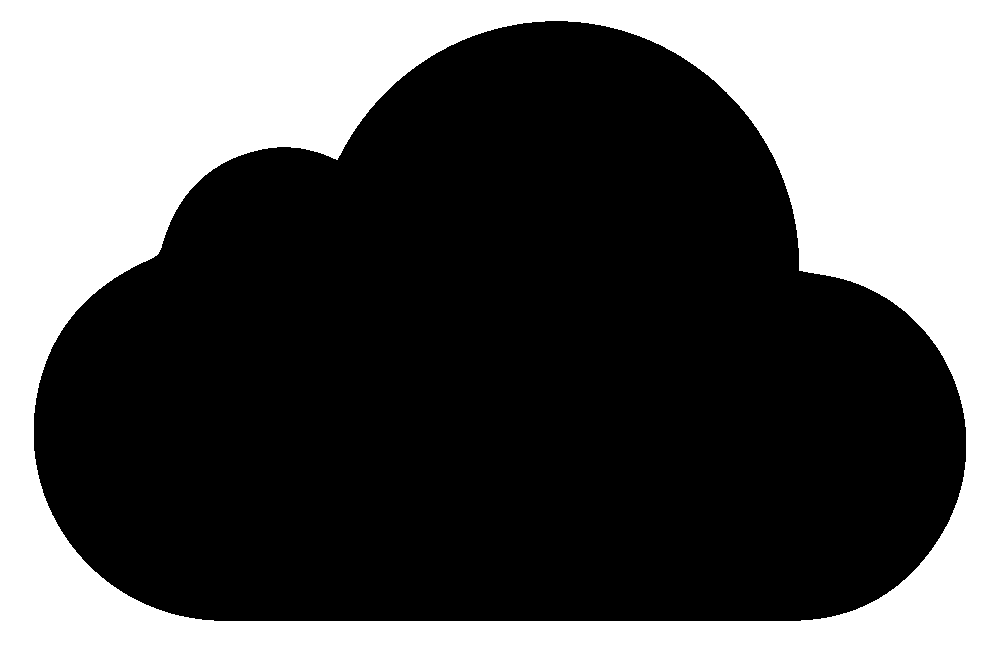

In [ ]:
# Tampilkan masking
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

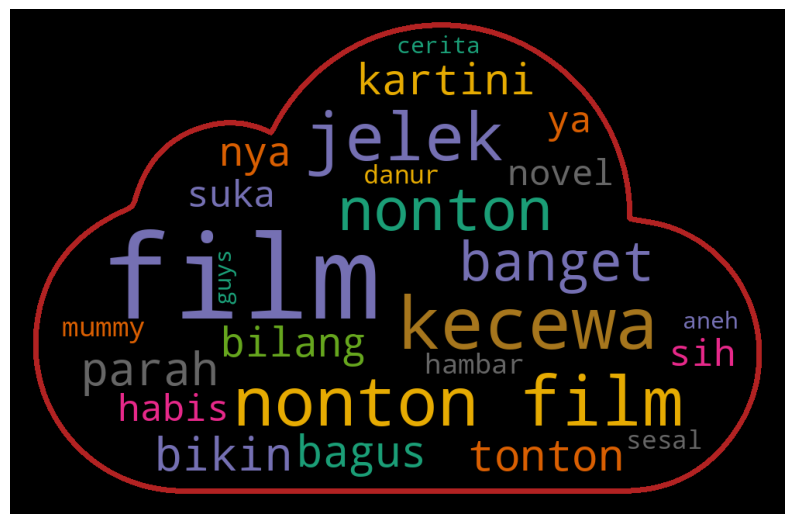

In [ ]:
# WordCloud Sentimen Negatif

sentiment_negative = data[data.Sentiment == 0]
negative_string = []

for t in sentiment_negative.clean_Tweet:
  negative_string.append(t)

negative_string = pd.Series(negative_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='black', colormap='Dark2',
                      max_font_size=150, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(negative_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

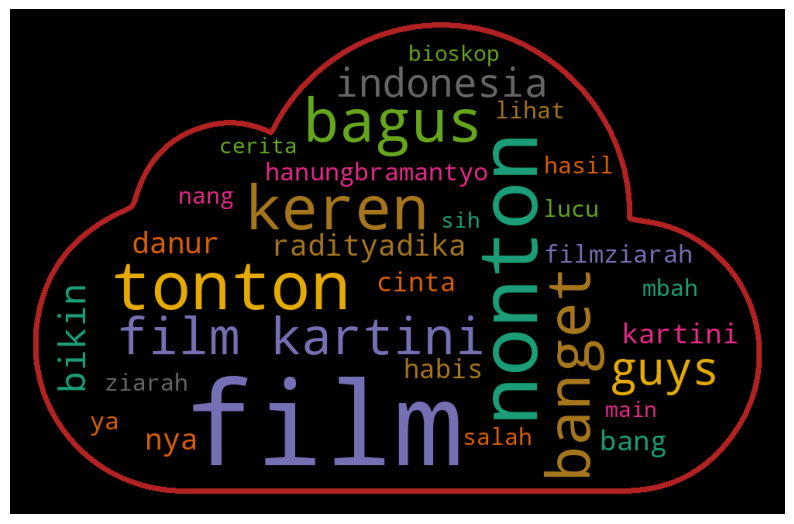

In [ ]:
# WordCloud Sentimen Positif

sentiment_positive = data[data.Sentiment == 1]
positive_string = []

for t in sentiment_positive.clean_Tweet:
  positive_string.append(t)

positive_string = pd.Series(positive_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='black', colormap='Dark2',
                      max_font_size=150, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(positive_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()